In [16]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.pyplot import figure
import seaborn as sns
from matplotlib import gridspec
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'lines.linewidth':3,
         'font.sans-serif':'Ariel',
          'font.size':12}
# font = {'fontname':'monospace', 'size':'15'}
pylab.rcParams.update(params)

### P-val distribution of combined cohort

In [3]:
### This notebook make plots for figure4 -- p-val distribution and FDR calculation
import pandas as pd
import os,pickle

In [4]:
cohorts = ['histology','organ','origin','system','pancancer']
dir_out = './figure4/'

In [40]:
feature_type = 'histology'
df_all = pd.read_csv(os.path.join(dir_out, 'p-val_distribution',feature_type+'.syn.<1isy.df_allp_forplot.062121.csv'),index_col = 0)

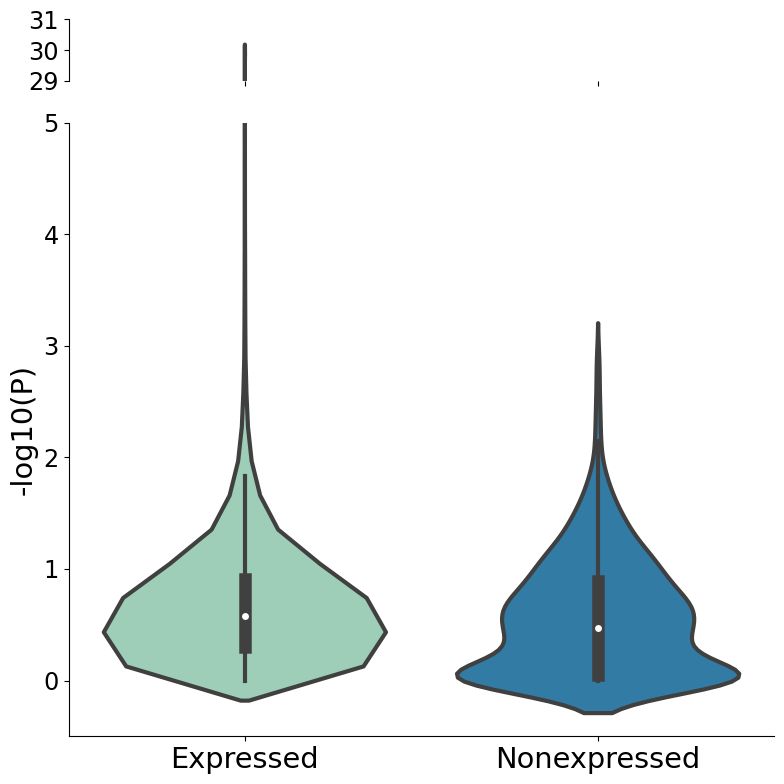

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(8,8),gridspec_kw={'height_ratios': [1, 10]})

# axes = df_all.boxplot(by='exp/nonexp', grid = False, return_type='axes',ax = axs[0])
axes = sns.violinplot(x="exp/nonexp", y="p",
                    data=df_all,
                    scale="width", palette="YlGnBu",ax = axs[0])
# sns.swarmplot(x="exp/nonexp", y="p",
#                     data=df_all, color="k", alpha=0.3)

# for ax in axes:
axes.set_ylim(29, 31)
axes.spines['bottom'].set_visible(False)
# axes.xaxis.tick_top()
axes.tick_params(labelbottom=False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.set_title('')
axes.set_yticks([29,30,31])
axes.set_yticklabels([29,30,31])
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# axes1 = df_all.boxplot(by='exp/nonexp',grid = False, return_type='axes', ax = axs[1])
axes1 = sns.violinplot(x="exp/nonexp", y="p",
                    data=df_all,
                    scale="width", palette="YlGnBu",ax = axs[1] )

axes1.set_ylim(-0.5,5)

axes1.spines['top'].set_visible(False)
axes1.xaxis.tick_bottom()
axes1.tick_params(labeltop=False)
axes1.set_title('')
axes1.set_xlabel('')
axes1.set_ylabel('-log10(P)',fontsize='xx-large')
axes1.spines['top'].set_visible(False)
axes1.spines['right'].set_visible(False)
axes1.set_xticklabels(['Expressed','Nonexpressed'],fontsize='xx-large')

plt.tight_layout()
# fig.suptitle('Non-1 P value distribution of expressed and non-expressed genes across all tumor types', x=0.5, y=1.1, fontsize='xx-large')
plt.savefig(os.path.join(dir_out,'figs', 'p-val_distribution.pdf'))

### Heatmap for syn res

In [1]:
import seaborn as sns
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt

cohorts = ['histology','organ','origin','system','pancancer']
dir_out = './figure4/'
dir_anlyze = '../mutsig_out/anlyze'


feature_type = 'histology';syn_nsyn = 'syn'
sig_pathlist = pickle.load(open(os.path.join(dir_anlyze, feature_type +'.'+syn_nsyn+'.sig_genes.pathlist.062121.pkl'),'rb'))
lfeat = [i.split('/')[-1].split('.')[0] for i in sig_pathlist]
df_syn = pd.read_csv(os.path.join(dir_out, 'p-val_distribution',feature_type+'.syn.df_all_forheatmap.062121.csv'),index_col = 0)

In [2]:
### Sort by genes
df_pivot_syn = df_syn.pivot_table('FDR', index='gene', columns='feature')
for feat in lfeat:
    if feat not in df_pivot_syn.columns:
        df_pivot_syn[feat] = float('NaN')
        print(f'No significant genes: {feat}')

No significant genes: CNS-Oligo
No significant genes: Bladder-TCC


In [3]:
df_pivot_syn['n_sig_gene'] = df_pivot_syn.notnull().sum(axis=1)
df_pivot_gene_syn = df_pivot_syn.sort_values(by = 'n_sig_gene', ascending = False)
df_pivot_gene_syn = df_pivot_gene_syn.iloc[:, 0:-1]

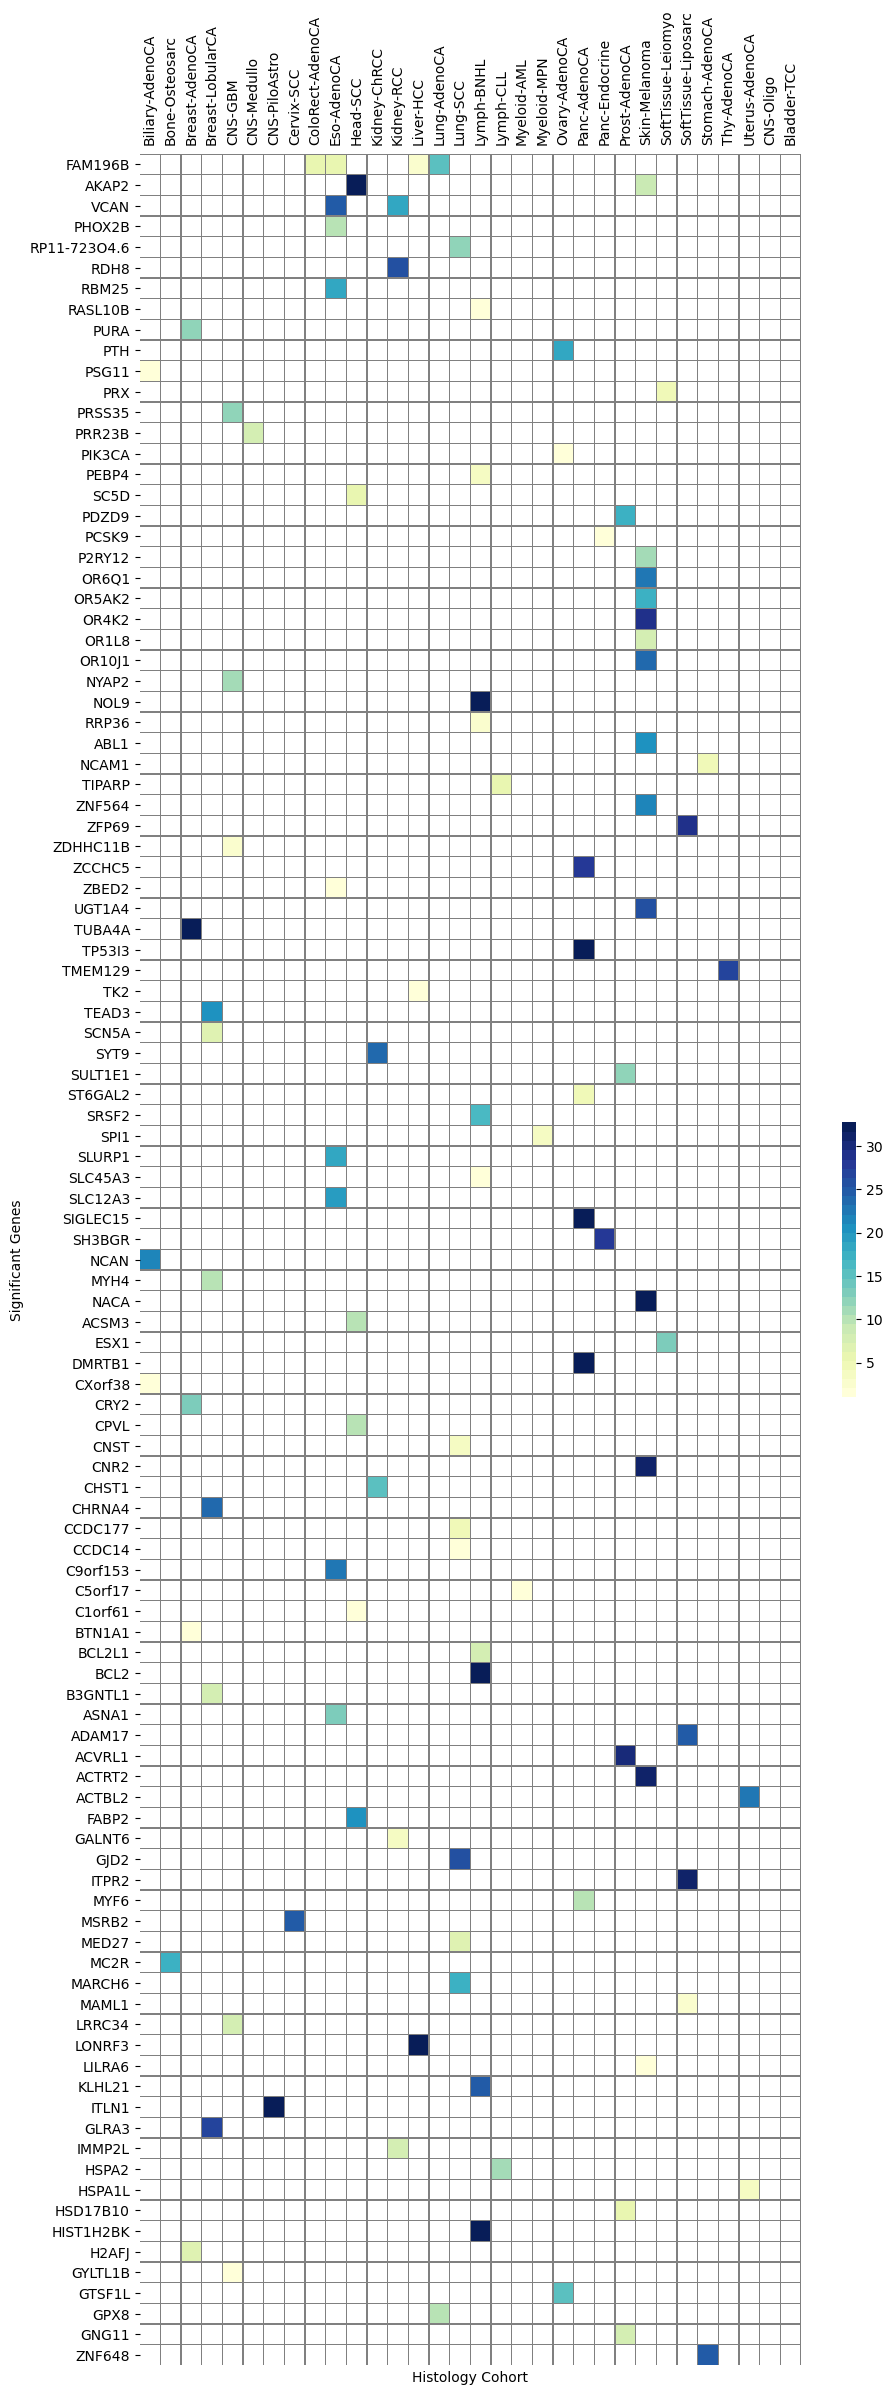

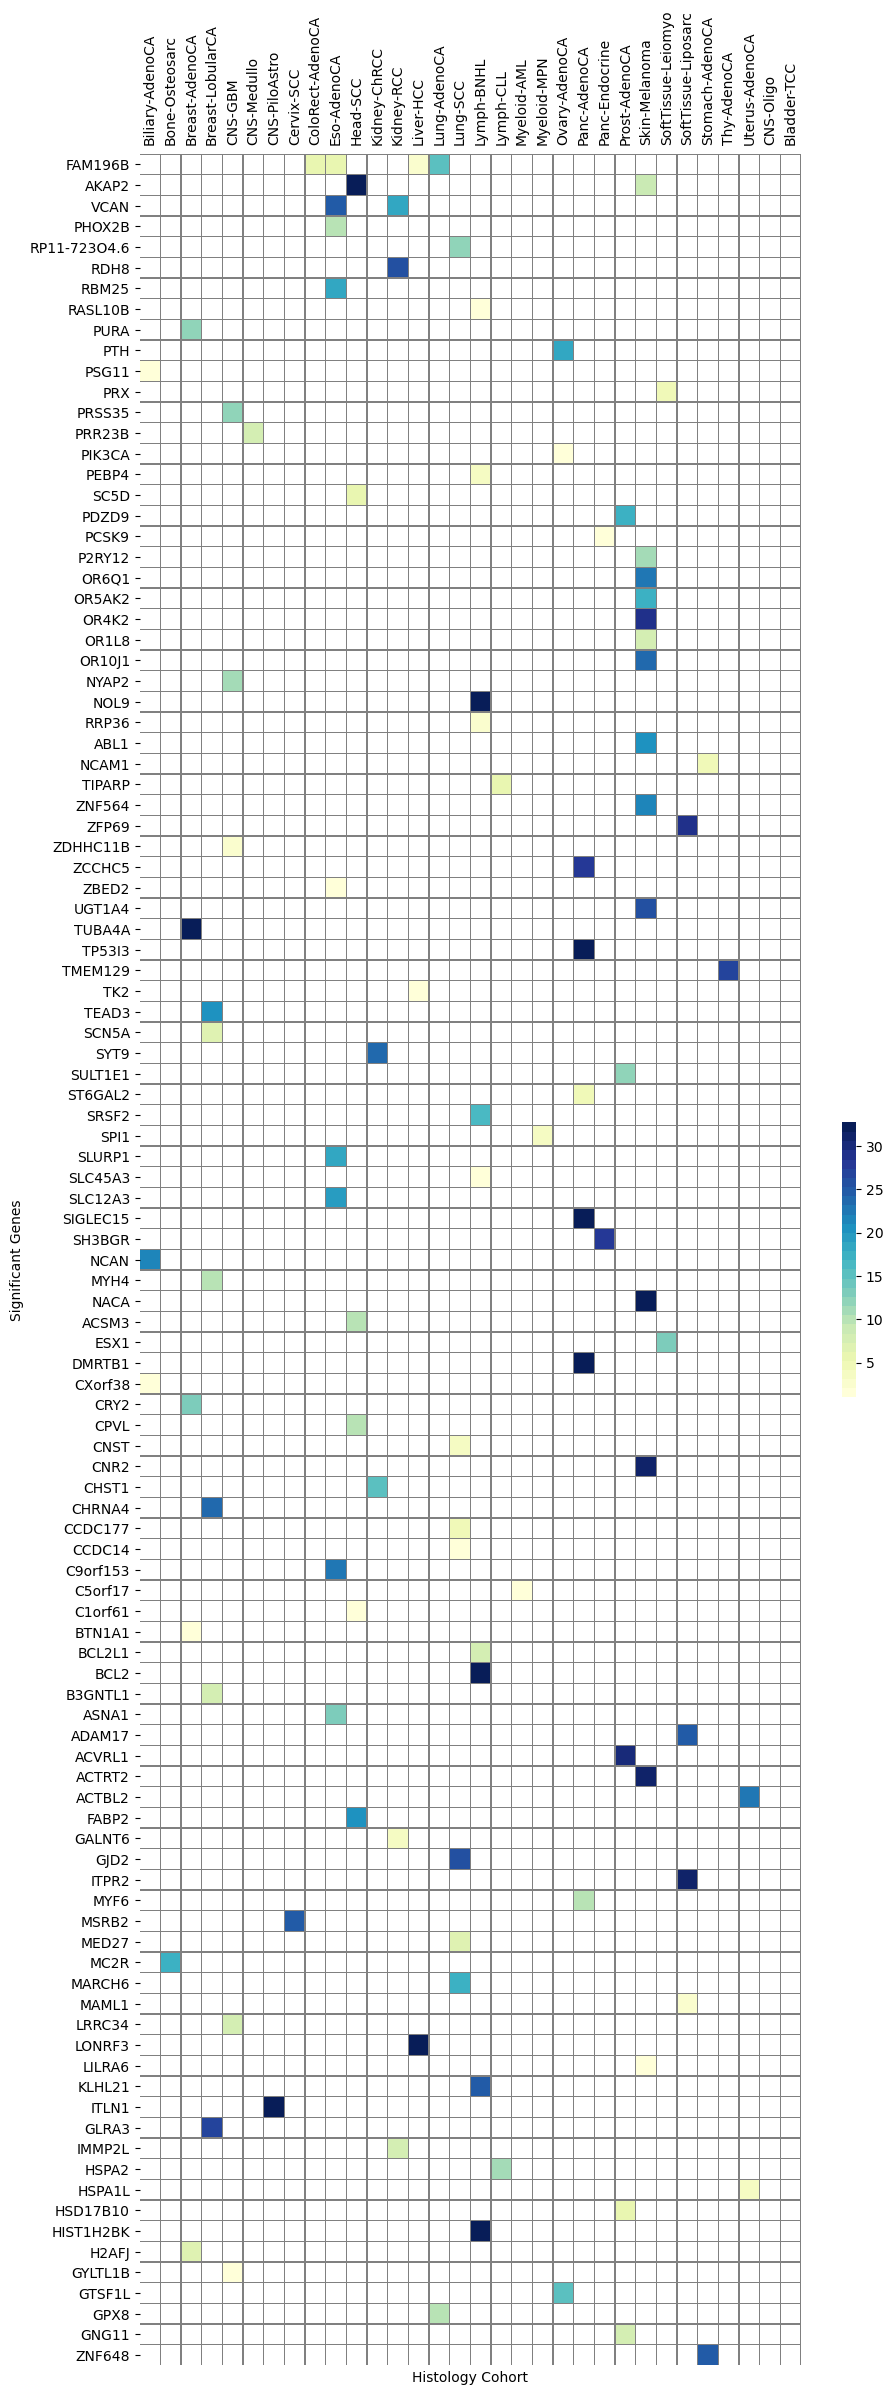

In [5]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
# params = {'legend.fontsize': 'large',
#          'axes.labelsize': 'large',
#          'axes.titlesize':'large',
#          'xtick.labelsize':'large',
#          'ytick.labelsize':'large',
#          'lines.linewidth':1,
#          'font.sans-serif':'Ariel',
#           'font.weight':'bold',
#          'axes.labelweight':'bold'
#           'font.size':5}
# pylab.rcParams.update(params)
fig, ax = plt.subplots(figsize=(len(df_pivot_gene_syn.columns)/3,len(df_pivot_gene_syn)/3))
cmap = plt.get_cmap("YlGnBu",30)
cmap.set_under('white')#Colour values less than vmin in white
ax = sns.heatmap(df_pivot_gene_syn,cmap=cmap,square = True, yticklabels=True,xticklabels=True,linewidth = .3,linecolor="grey", cbar_kws={"shrink": 0.1})
ax.set_ylabel('Significant Genes'); ax.set_xlabel('Histology Cohort')
ax.tick_params(axis='x', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True,rotation = 90)
plt.show()
# plt.savefig(os.path.join(dir_out,'figs','syn_heatmap.063021.png'))